In [79]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

df_path = "/content/drive/MyDrive/Thesis_Organized/Data/Ground Truth/annotations.csv"
annotations_df = pd.read_csv(df_path).drop(columns = ["Unnamed: 0"])

In [166]:
gt_path = "/content/drive/MyDrive/Thesis_Organized/Data/Original Images"
folder_path =  "/content/drive/MyDrive/Thesis_Organized/Detectron2/Test_results/test_images/original_test_images"

def correct_segmentations(seg):
  corrected_seg = []
  for i in seg[1:-1].split(","):
    corrected_seg.append(float(i))
  return corrected_seg

def plot_img_points_bbox_segcontour_by_name(gt_path, labels_df, im_name):
  img_path = os.path.join(gt_path, "Test", im_name)
  title = im_name
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap = "gray")
  colors = ["red", "yellow", "green", "blue", "orange", "pink", "violet", "midnightblue", "tan", "palegreen"]

  image_name = im_name
  view = labels_df.name == image_name

  points = labels_df.loc[view, ['p1_x', 'p1_y', 'p2_x', 'p2_y','p3_x', 'p3_y']].values
  bbox = labels_df.loc[view, ["bbox_x", "bbox_y", "bbox_width", "bbox_height"]].values.copy()
  segmentation = labels_df.loc[view, "segmentation"].map(lambda x: correct_segmentations(x)).values.copy()

  for j in range(points.shape[0]):
    plt.scatter([points[j,0], points[j,2], points[j,4]], [points[j,1], points[j,3], points[j,5]], color=colors[j], s = 20)
    bbox_x = np.array([bbox[j][0], bbox[j][0] + bbox[j][2], bbox[j][0] + bbox[j][2], bbox[j][0], bbox[j][0]])
    bbox_y = np.array([img.shape[0] - bbox[j][1], img.shape[0] - bbox[j][1],
                      img.shape[0] - bbox[j][1]-bbox[j][3],
                      img.shape[0] - bbox[j][1]-bbox[j][3],
                      img.shape[0] - bbox[j][1]])
    plt.plot(bbox_x, bbox_y, color = colors[j], linewidth = 0.2)
    x_segmentation = np.array(segmentation[j][::2])
    y_segmentation = np.array(segmentation[j][1::2])
    plt.plot(x_segmentation, y_segmentation, color = colors[j], linewidth = 0.5)

  plt.title(title)
  plt.axis("off");
  print(title)

  print(f"Image shape: {img.shape}")
  plt.show()

In [167]:
my_results_imgs_path = "/content/drive/MyDrive/Thesis_Organized/Detectron2/Inference_testset/4/X101_l1smooth_0.975_0.005_True_8/test_images"
ciro_results_imgs = "/content/drive/MyDrive/Thesis_Organized/Detectron2/Inference_testset/results_ciro"
rand_img = random.choice(os.listdir(my_results_imgs_path))

In [168]:
my_res = os.path.join(my_results_imgs_path, rand_img)
ciro_res = os.path.join(ciro_results_imgs, rand_img)
my_image = Image.open(my_res)
ciro_image2 = Image.open(ciro_res)

R1Ap5_7-1-100.png
Image shape: (517, 658, 4)


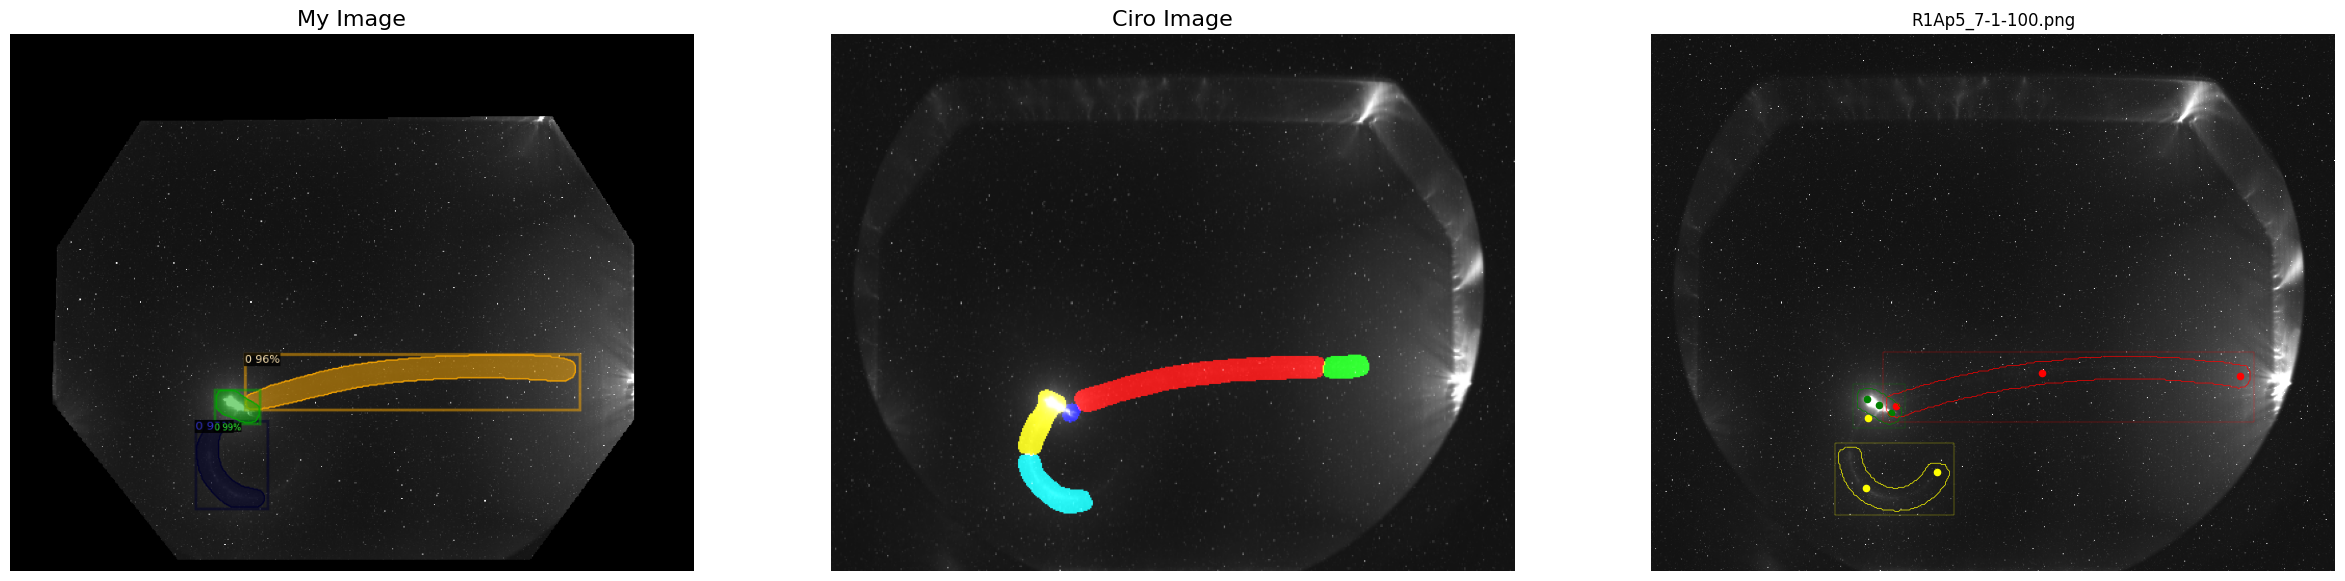

In [169]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def plot_img_points_bbox_segcontour_by_name(ax, gt_path, labels_df, im_name):
    img_path = os.path.join(gt_path, "Test", im_name)
    title = im_name
    img = mpimg.imread(img_path)
    ax.imshow(img, cmap="gray")
    colors = ["red", "yellow", "green", "blue", "orange", "pink", "violet", "midnightblue", "tan", "palegreen"]

    image_name = im_name
    view = labels_df.name == image_name

    points = labels_df.loc[view, ['p1_x', 'p1_y', 'p2_x', 'p2_y','p3_x', 'p3_y']].values
    bbox = labels_df.loc[view, ["bbox_x", "bbox_y", "bbox_width", "bbox_height"]].values.copy()
    segmentation = labels_df.loc[view, "segmentation"].map(lambda x: correct_segmentations(x)).values.copy()

    for j in range(points.shape[0]):
        ax.scatter([points[j,0], points[j,2], points[j,4]], [points[j,1], points[j,3], points[j,5]], color=colors[j], s=20)
        bbox_x = np.array([bbox[j][0], bbox[j][0] + bbox[j][2], bbox[j][0] + bbox[j][2], bbox[j][0], bbox[j][0]])
        bbox_y = np.array([img.shape[0] - bbox[j][1], img.shape[0] - bbox[j][1],
                          img.shape[0] - bbox[j][1] - bbox[j][3],
                          img.shape[0] - bbox[j][1] - bbox[j][3],
                          img.shape[0] - bbox[j][1]])
        ax.plot(bbox_x, bbox_y, color=colors[j], linewidth=0.2)
        x_segmentation = np.array(segmentation[j][::2])
        y_segmentation = np.array(segmentation[j][1::2])
        ax.plot(x_segmentation, y_segmentation, color=colors[j], linewidth=0.5)

    ax.set_title(title)
    ax.axis("off")
    print(title)
    print(f"Image shape: {img.shape}")

# Usage example with the modified function
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
# fig.suptitle("comparison", fontsize=20)

# Display the first image
axes[0].imshow(my_image)
axes[0].axis('off')
axes[0].set_title('My Image', fontsize=16)

# Display the second image
axes[1].imshow(ciro_image2)
axes[1].axis('off')
axes[1].set_title('Ciro Image', fontsize=16)

# Display the third image using the modified function
plot_img_points_bbox_segcontour_by_name(axes[2], gt_path, annotations_df, rand_img)

plt.show()